In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Task.csv')


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [5]:
data.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


#Remove rows with missing values :

In [6]:
data= data.dropna()

#Fill missing values

In [7]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Salary'].fillna(data['Salary'].mean(), inplace=True)

<ipython-input-7-2df02ca353c0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)
<ipython-input-7-2df02ca353c0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [8]:
data.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
5,France,35.0,58000.0,Yes


#Encode "country , purchased"

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Purchased'] = le.fit_transform(data['Purchased'])

In [10]:
data = pd.get_dummies(data, columns=['Country'])

#This would transform the
#“Country” column into three new columns: Country_France, Country_Spain, and Country_Germany.

In [11]:
data.head()

,Age,Salary,Purchased,Country_France,Country_Germany,Country_Spain
0,44.0,72000.0,0,True,False,False
1,27.0,48000.0,1,False,False,True
2,30.0,54000.0,0,False,True,False
3,38.0,61000.0,0,False,False,True
5,35.0,58000.0,1,True,False,False


#Scale Numerical Data

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Age', 'Salary']] = scaler.fit_transform(data[['Age', 'Salary']])

#عشان يكونون كلهم في نطاق مشترك

In [13]:
data.head()

,Age,Salary,Purchased,Country_France,Country_Germany,Country_Spain
0,0.699858,0.589891,0,True,False,False
1,-1.513647,-1.507499,1,False,False,True
2,-1.123028,-0.983152,0,False,True,False
3,-0.081379,-0.371413,0,False,False,True
5,-0.471997,-0.633587,1,True,False,False


In [14]:
print(data.head())

        Age    Salary  Purchased  Country_France  Country_Germany  \
0  0.699858  0.589891          0            True            False   
1 -1.513647 -1.507499          1           False            False   
2 -1.123028 -0.983152          0           False             True   
3 -0.081379 -0.371413          0           False            False   
5 -0.471997 -0.633587          1            True            False   

   Country_Spain  
0          False  
1           True  
2          False  
3           True  
5          False  


DATA ANALYSIS


In [15]:
data.describe()

,Age,Salary,Purchased
count,8.000000e+00,8.000000,8.000000
mean,5.551115e-17,0.000000,0.500000
std,1.069045e+00,1.069045,0.534522
min,-1.513647e+00,-1.507499,0.000000
25%,-6.347550e-01,-0.720978,0.000000
50%,-1.464819e-01,-0.109239,0.500000
75%,8.300642e-01,0.742826,1.000000
max,1.481095e+00,1.551195,1.000000


In [22]:
data['Age'] = data['Age'].abs()
data['Salary'] = data['Salary'].abs()

In [23]:
data['Age'] = data['Age'].apply(lambda x: max(x, 0))
data['Salary'] = data['Salary'].apply(lambda x: max(x, 0))

In [24]:
data.describe()

,Age,Salary,Purchased
count,8.000000,8.000000,8.000000
mean,0.850409,0.873913,0.500000
std,0.562448,0.519645,0.534522
min,0.081379,0.152935,0.000000
25%,0.406894,0.535271,0.000000
50%,0.911443,0.808369,0.500000
75%,1.285786,1.278097,1.000000
max,1.513647,1.551195,1.000000


<Axes: xlabel='Purchased', ylabel='count'>

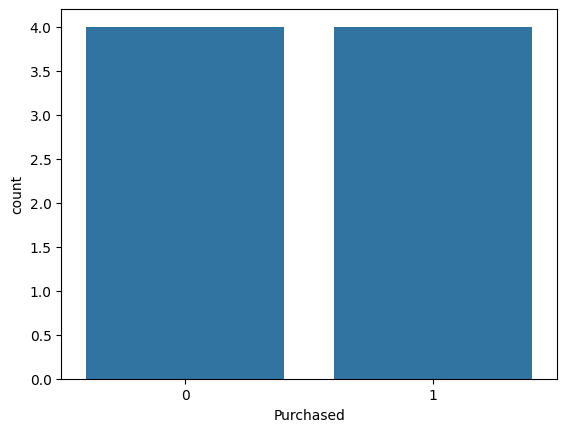

In [25]:
sns.countplot(x='Purchased', data=data)

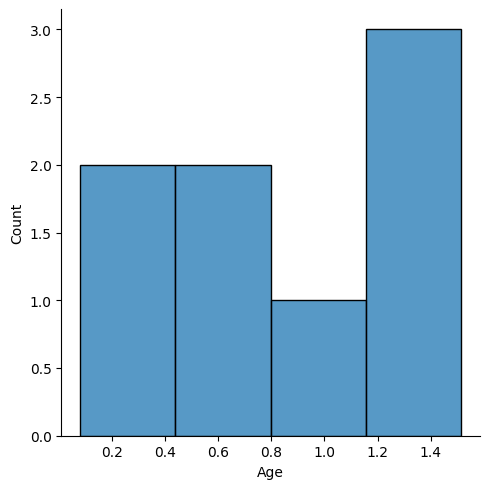

In [26]:
sns.displot( x=data['Age'])

<Axes: xlabel='Salary', ylabel='count'>

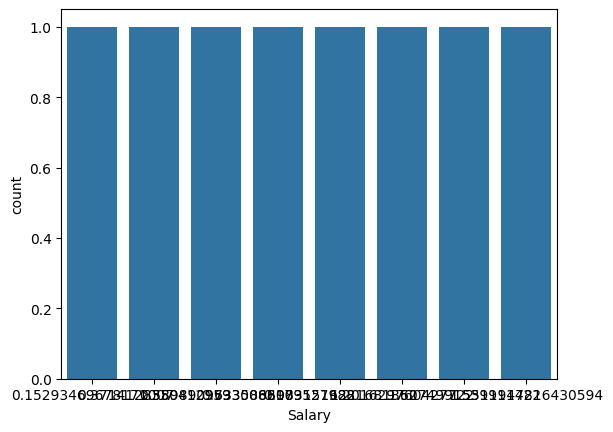

In [27]:
sns.countplot(x='Salary', data=data)

<Axes: xlabel='Salary', ylabel='Count'>

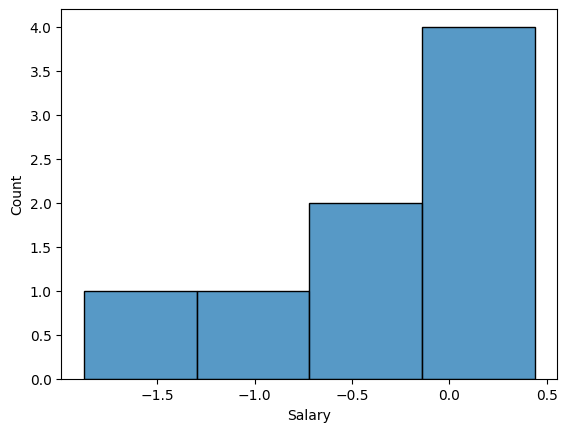

In [28]:
sns.histplot(np.log(data['Salary']))